In [3]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#importing the dataset

data = pd.read_csv(r'D:\Non-Academics\AI\Projects\Diabetes_Prediction\diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# storing the column of outcome
target = data['Outcome']

In [6]:
# dropping the Outcome column

data.drop('Outcome', axis= 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
# standardizing data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [8]:
# now implementing the pca
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [9]:
principalDf

,principal component 1,principal component 2
0,-75.714249,-35.954944
1,-82.358466,28.909559
2,-74.630229,-67.909633
3,11.077206,34.900175
4,89.744156,-2.751263
...,...,...
763,99.237653,25.083009
764,-78.641427,-7.685767
765,32.112987,3.379222
766,-80.214095,-14.190595


In [15]:
finalDf = pd.concat([principalDf, target], axis=1)
finalDf

,principal component 1,principal component 2,Outcome
0,-75.714249,-35.954944,1
1,-82.358466,28.909559,0
2,-74.630229,-67.909633,1
3,11.077206,34.900175,0
4,89.744156,-2.751263,1
...,...,...,...
763,99.237653,25.083009,0
764,-78.641427,-7.685767,0
765,32.112987,3.379222,0
766,-80.214095,-14.190595,1


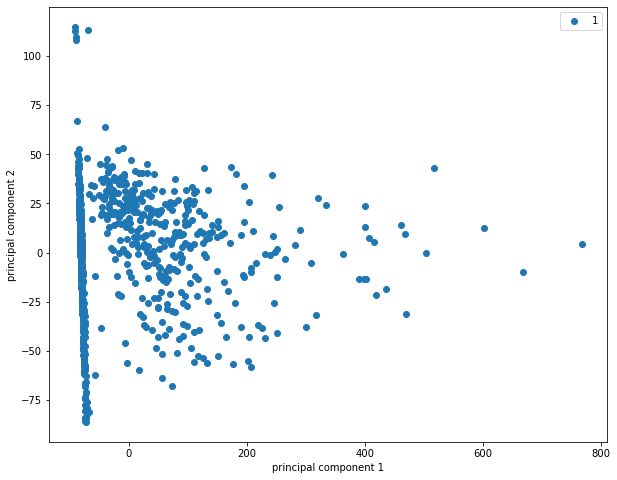

In [23]:
plt.figure(figsize= (10, 8))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
targets = ['']
plt.legend(finalDf['Outcome'])